# KL-дивергенция

$D_{KL} (p|p') =  \sum \limits_{j=1}^m p_j  \log_q \frac{p_j}{p'_j} = CE(p|p') - H(p) \geq 0 $

**KL-дивергенция - это несимметричный аналог расстояния**

1. $D_{KL} (p|p') \geq 0 $

2. $D_{KL} (p|p) = 0 $

3. $D_{KL}(p|p') = 0 \implies p = p'$

## Пример 1

$X \sim Bern(0.6), \; Y \sim Bern(0.7), \; Z \sim Bern(0.8)$

In [1]:
from scipy.stats import entropy
from scipy.stats import bernoulli
import numpy as np


p_x = 0.6
p_y = 0.7
p_z = 0.8


KL_xy = entropy(bernoulli.pmf([0,1], p_x) , bernoulli.pmf([0,1], p_y))
KL_yz = entropy(bernoulli.pmf([0,1], p_y) , bernoulli.pmf([0,1], p_z))
KL_xz = entropy(bernoulli.pmf([0,1], p_x) , bernoulli.pmf([0,1], p_z))

print('KL(p_x| p_y) + KL(p_y | p_z) = ', KL_xy, '+', KL_yz, '=', KL_xy + KL_yz)
print('KL(p_x| p_z) = ', KL_xz)

KL(p_x| p_y) + KL(p_y | p_z) =  0.022582421084357387 + 0.02816755759528354 = 0.05074997867964093
KL(p_x| p_z) =  0.10464962875290965


# ЕМ-алгоритм

## Алгоритм общий

Пусть число компонент смеси равно $K$, в каждой компоненте своё распределение $p_\theta( T=t | C =k)$, которое тоже задаётся задачей и известно в каком-то виде. Вероятность выбора компоненты $k$ равна $\pi_k$. 

Итого в оцениваемые параметры $\theta$ включены:
* Вероятности выбора компонент (веса смеси) $\pi_1,..,\pi_K$
* Параметры условного распределения $p_\theta( T=t | C =k)$, в каждой компоненте $k$ они свои

1. Выбрать $\theta_0$. 

2. **Е-шаг**: Записать нижнюю оценку на правдоподобие в текущей точке $\theta_0$

$l(\theta) \geq ELBO(\theta_0, \theta)  =$

$= Q(\theta_t, \theta) + \sum \limits_{i=1}^n H(p_{\theta_0}(C_i = c_i | T_i=t_i) ) = \sum \limits_{i=1}^n  \sum \limits_{k=1}^K \gamma_{C_i}(k) \left( \ln \pi_k + \ln p_{\theta}(t_i \vert C_i=k)\right) + \sum \limits_{i=1}^n H(p_{\theta_0}(C_i = c_i | T_i=t_i) )$

Последнее слагаемое не зависит от $\theta$, для оптимизации оно не нужно. Посчитать веса 
$$
\gamma_{C_i}(k) = p_{\theta_0}(C_i = k | T_i = t_i)
$$
как апостериорные распределения скрытой переменной $C_i$ в вероятностной модели с параметром $\theta_0$. Для каждого $i$ оно своё.

3. **М-шаг**: Максимизировать нижнюю оценку по $\theta$

$\theta_{1}= \arg \max \limits_{\theta} ELBO(\theta_0, \theta) = \arg \max \limits_{\theta} Q(\theta_0, \theta) = \arg \max \limits_{\theta} \sum \limits_{i=1}^n  \sum \limits_{k=1}^K \gamma_{C_i}(k) \left( \ln \pi_k + \ln p_{\theta}(t_i \vert C_i=k)\right)  $

4. Задать $\theta_0=\theta_{1}$ и вернуться на шаг 2, либо закончить и вернуть $\theta_1$ в качестве оценки.


# Задача 1. Смесь нормальных распределений

**Дано**: выборка $\{T_1, ..., T_n\}, \; T_i$ - наблюдаемый d-мерный вектор

**Модель**:

$C_i$ - компонента смеси для i-го наблюдения

$\mathbb{P}(C_i = k) = \pi_k, \; (T_i | C_i = k)  \overset{iid}{\sim} \mathbb{\N}(\mu_k, \Sigma_k), \; p(C_i, T_i) = p(C_i) \cdot p(T_i | C_i)$

**Параметры**

$\theta = (\pi_1, \ldots, \pi_K, \mu_1, \ldots, \mu_K, \Sigma_1, \ldots, \Sigma_K)$


## Задача 2. Пример c 2 кофейнями.

**Дано**: выборка $\{T_1, ..., T_n\}, \; T_i $-  время ожидания в кофейне

**Модель**:

$C_i$ - номер кофейни (скрытые переменнные)

$C_i \overset{iid}{\sim} Bern(q), \; T_i | C_i  \overset{iid}{\sim} Exp(\lambda_{C_i}), \; p(C_i, T_i) = p_q(C_i) \cdot p_{\lambda_{C_i}}(T_i | C_i)$

**Параметры**

$\theta = (q, \lambda_0, \lambda_1)$



In [2]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://people.duke.edu/~ccc14/sta-663/_images/EMAlgorithm_19_0.png", width=700, height=500)

## Алгоритм для примера с 2 кофейнями

**Е-шаг**

$\gamma_i^0(t) = \frac{\lambda_0^0 \exp[-\lambda_0^0 T_i] (1-q^0)}{\lambda_0^0 \exp[-\lambda_0^0 T_i] (1-q^0) + \lambda_1^0 \exp[-\lambda_1^0 T_i] q^0}$  

$\gamma_i^1(t) = \frac{\lambda_1^0 \exp[-\lambda_1^0 T_i] q^0}{\lambda_0^0 \exp[-\lambda_0^0 T_i] (1-q^0) + \lambda_1^0 \exp[-\lambda_1^0 T_i] q^0}$

$Q(\theta_0, \theta) = \sum \limits_{i=1}^n \gamma_i^0(t) [ \ln (1-q) + \ln \lambda_0  -\lambda_0 T_i )] + \gamma_i^1(t) [ \ln q +  \ln \lambda_1  -\lambda_1 T_i )]$

**М-шаг**

$q^{1} = \frac{1}{n} \sum \limits_{i=1}^n \gamma_i^1(t) $

$\lambda_0^{1} = \frac{\sum \limits_{i=1}^n \gamma_i^0(t)}{\sum \limits_{i=1}^n \gamma_i^0(t) T_i}$

$\lambda_1^{1} = \frac{\sum \limits_{i=1}^n \gamma_i^1(t)}{\sum \limits_{i=1}^n \gamma_i^1(t) T_i}$


## Моделирование смеси и применение ЕМ алгоритма



Модель совместного распределия наблюдаемых и ненаблюдаемых переменных

$с_i \overset{iid}{\sim} Bern(q), \; T_i | c_i  \overset{iid}{\sim} Exp(\lambda_{c_i}), \; p((c_i, T_i)) = p_q(c_i) \cdot p_{\lambda_{c_i}}(T_i | c_i)$

Модель распределения наблюдаемых переменных

$p(T_i) = p(T_i | c_i = 0) p(c_i = 0) + p(T_i | c_i = 1) p(c_i = 1)$

$T_i \sim (1-q) Exp(\lambda_{c_0}) +q Exp(\lambda_1)$ - смесь распределений

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import expon
from scipy.stats import bernoulli

In [4]:

class ExponentialMixtureModel:
    def __init__(self, lambda_1, lambda_2, q):
        """
        Initialize the Exponential Mixture Model with two exponential components.

        Parameters:
        - lambda_1 (float): Rate parameter for the first exponential distribution.
        - lambda_2 (float): Rate parameter for the second exponential distribution.
        - q (float): Mixing proportion for the second component (probability of selecting the second component).
                     The mixing proportion for the first component is (1 - q).
        """
        self.q = q
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2

        self.lambdas = [lambda_1, lambda_2]
        self.qs = [1 - q, q]

        self.Q_history = []

    def sample(self, N=10):
        """
        Generate samples from the exponential mixture model.

        Parameters:
        - N (int): Number of samples to generate. Default is 10.

        Returns:
        - samples (np.ndarray): Array of generated samples.
        - cluster_assignments (np.ndarray): Array indicating from which component each sample was drawn (0 or 1).
        """
        
        cluster_assignments = bernoulli.rvs(self.q, size=N)
        samples = np.array([expon.rvs(scale=1. / self.lambdas[ca]) for ca in cluster_assignments])

        samples_1 = samples[cluster_assignments == 1]
        samples_0 = samples[cluster_assignments == 0]

        self.rand_unif = np.random.uniform(size=N)

        f, ax = plt.subplots(figsize=(7, 4))

        ax.grid()
        ax.set_xlabel("Waiting time")
        ax.set_title("Dataset of waiting times in 2 cafes with preference = {}".format(self.q))
        ax.scatter(samples_0, self.rand_unif[cluster_assignments == 0], color='pink',
                   label='cafe 0 with 1/lambda_0 = {}'.format(1 / self.lambda_1))
        ax.scatter(samples_1, self.rand_unif[cluster_assignments == 1], color='purple', alpha=0.7,
                   label='cafe 1 with 1/lambda_1 = {}'.format(1 / self.lambda_2))
        plt.legend()

        return samples, cluster_assignments

    def pdf(self, x_axis):
        """
        Compute the probability density function (PDF) of the exponential mixture model at given points.

        Parameters:
        - x_axis (array-like): Points at which to evaluate the PDF.

        Returns:
        - pdf_values (np.ndarray): The values of the PDF at the specified points.
        """
        return self.qs[0] * expon.pdf(x_axis, scale=1. / self.lambdas[0]) + \
               self.qs[1] * expon.pdf(x_axis, scale=1 / self.lambdas[1])

    def loglikelihood(self, samples):
        """
        Compute the log-likelihood of the data under the current model parameters.

        Parameters:
        - samples (array-like): Observed data samples.

        Returns:
        - l (float): The log-likelihood value.
        """
        l = np.sum(np.log(self.pdf(samples)))
        return l

    def plotEM(self, samples, w):
        """
        Plot the data points colored by their posterior probabilities (after EM fitting).

        Parameters:
        - samples (array-like): Observed data samples.
        - w (np.ndarray): Posterior probabilities (responsibilities) for each component.

        Returns:
        - None
        """
        samples_1 = samples[w[:, 1] > 0.5]
        samples_0 = samples[w[:, 0] > 0.5]

        f, ax = plt.subplots(figsize=(7, 4))

        ax.grid()
        ax.set_xlabel("Waiting time")
        ax.set_title("Split of data with estimated preference = {:.2f}".format(self.qs_estim[1]))
        ax.scatter(samples_0, self.rand_unif[w[:, 0] > 0.5], color='pink',
                   label='cafe 0, 1/lambda_0 = {:.2f}'.format(1. / self.lambdas_estim[0]))
        ax.scatter(samples_1, self.rand_unif[w[:, 1] > 0.5], color='purple', alpha=0.7,
                   label='cafe 1, 1/lambda_1 = {:.2f}'.format(1. / self.lambdas_estim[1]))
        plt.legend()

        return None

    def e_step(self):
        """
        Perform the Expectation (E) step of the EM algorithm.

        Updates the responsibilities (posterior probabilities) for each data point and component.
        """
        self.logits = np.array([expon.pdf(self.data, scale=1. / lambda_) * pi_
                                for lambda_, pi_ in zip(self.lambdas_estim, self.qs_estim)]).T

        self.gammas = self.logits / self.logits.sum(axis=1, keepdims=True)

    def m_step(self):
        """
        Perform the Maximization (M) step of the EM algorithm.

        Updates the model parameters based on the current responsibilities.
        """

        qs_estim_new = self.gammas.sum(axis=0) / self.N
        lambdas_estim_new = []
        for i, w_sum in enumerate(self.gammas.sum(axis=0)):
            lambdas_estim_new.append(w_sum / (self.gammas[:, i] * self.data).sum())

        logits = np.array([expon.pdf(self.data, scale=1. / lambda_) * pi_
                                for lambda_, pi_ in zip(lambdas_estim_new, qs_estim_new)]).T


        Q = (self.gammas * np.log(logits)).sum()
        self.Q_history.append(Q)
       
        self.qs_estim = qs_estim_new
        self.lambdas_estim = lambdas_estim_new

    def fitEM(self, data, nSteps, lambda_1_init, lambda_2_init, q_init):
        """
        Fit the Exponential Mixture Model to data using the EM algorithm.

        Parameters:
        - data (array-like): Observed data samples.
        - nSteps (int): Number of EM iterations to perform.
        - lambda_1_init (float): Initial estimate for lambda_1.
        - lambda_2_init (float): Initial estimate for lambda_2.
        - q_init (float): Initial estimate for the mixing proportion q of the second component.

        Returns:
        - None
        """
        self.qs_estim = [1 - q_init, q_init]
        self.lambdas_estim = [lambda_1_init, lambda_2_init]

        self.data = data
        self.N = len(data)

        for _ in range(nSteps):
            self.e_step()
            self.m_step()

        # Plot estimation of cafes in dataset
        self.plotEM(self.data, self.gammas)


In [5]:
# Define true model

T_mean_1 = 1
T_mean_2 = 10

preference = 0.3

T_model = ExponentialMixtureModel(lambda_1= 1. / T_mean_1, lambda_2= 1. / T_mean_2, q=preference)

Text(0.5, 1.0, 'PDF of mixture model')

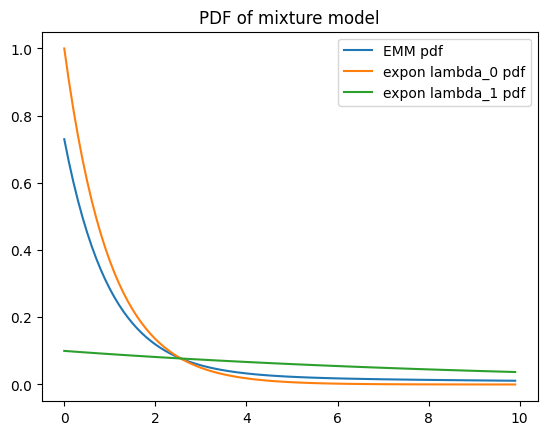

In [6]:
# Plot PDF

x_axis = np.arange(0, 10, 0.1)

fig, ax = plt.subplots(1, 1)
ax.plot(x_axis, T_model.pdf(x_axis), label='EMM pdf' )
ax.plot(x_axis, expon.pdf(x_axis, 0, 1/T_model.lambdas[0]), label='expon lambda_0 pdf')
ax.plot(x_axis, expon.pdf(x_axis, 0,  1/T_model.lambdas[1]), label='expon lambda_1 pdf')

ax.legend()
ax.set_title("PDF of mixture model")

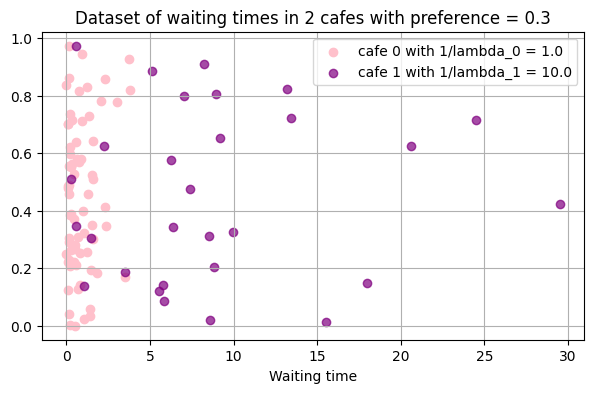

In [7]:
# Generate samples

samples, cluster_assignments = T_model.sample(100)


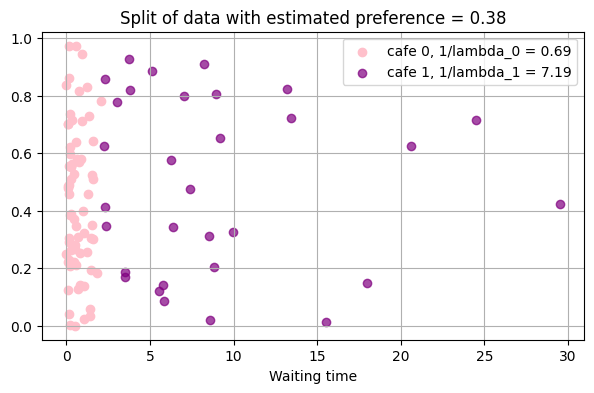

In [8]:
# Set initial values and fit EM

T_mean_1_init = 5
T_mean_2_init = 15

preference_init = 0.5

Q_history = T_model.fitEM(samples, 20, 1. / T_mean_1_init , 1 / T_mean_2_init, preference_init)


Text(0, 0.5, 'Q value')

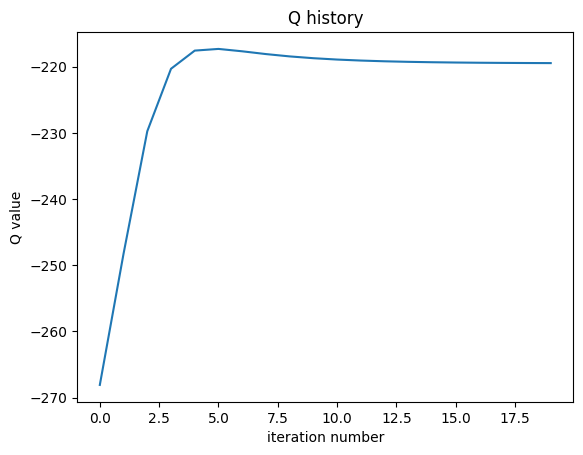

In [9]:
plt.plot(T_model.Q_history)
plt.title("Q history")
plt.xlabel("iteration number")
plt.ylabel("Q value")

## Задача 3*

**Модель**

$Z_i \overset{iid}{\sim} Bern(q), \; X_i | Z_i  \overset{iid}{\sim} Pois(\lambda_{Z_i}), \; p((Z_i, X_i)) = p_q(Z_i) \cdot p_{\lambda_{Z_i}}(X_i | Z_i)$

**Выборка**

$\{\hat{X}_i\}_{i=1}^n$

**Параметры**

$\theta = (q, \lambda_0, \lambda_1)$